# Analysis of VEHICLe Fragments Aligned to BRD4

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import sys

sys.path.append("../")
sys.path.append("../../")

In [3]:
import pickle
import pandas as pd

import seaborn as sns

In [4]:
from utils import show

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Load alignement data:

In [5]:
with open("BRD4-VEHICLe.pkl", "br") as fin:
    alignments = pickle.load(fin)

Convert nested index values into tuples:

In [6]:
d = {}
for outerKey, innerDict in alignments.items():
    for innerKey, values in innerDict.items():
        d[(outerKey, innerKey)] = values

In [7]:
df = pd.DataFrame.from_dict(d)
df = df.stack(level=0).swaplevel().sort_index()
df.index.names = ["lig", "idx"]
df

cfit  fragment  \
lig      idx                        
ligand-1 0     0.867435      1046   
         1     0.941176         0   
         2     0.932515         1   
         3     0.812500      1047   
         4     0.889552        10   
...                 ...       ...   
ligand-9 5414  0.829412       995   
         5415  0.720339       996   
         5416  0.896226       997   
         5417  0.821918       998   
         5418  0.904899       999   

                                                        fragmol      gfit  \
lig      idx                                                                
ligand-1 0     <rdkit.Chem.rdchem.Mol object at 0x7f5abf0f25e0>  0.841499   
         1     <rdkit.Chem.rdchem.Mol object at 0x7f5abf0f2630>  0.818182   
         2     <rdkit.Chem.rdchem.Mol object at 0x7f5abf0f2680>  0.754601   
         3     <rdkit.Chem.rdchem.Mol object at 0x7f5abf0f26d0>  0.741848   
         4     <rdkit.Chem.rdchem.Mol object at 0x7f5abf0f2720>  0.761194   
...                                                         ...       ...   
ligand-9 5414  <rdkit.Chem.rdchem.Mol object at 0x7f5abed536d0>  0.791176   
         5415  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53720>  0.720339   
         5416  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53770>  0.789308   
         5417  <rdkit.Chem.rdchem.Mol object at 0x7f5abed537c0>  0.668493   
         5418  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53810>  0.847262   

                   hfit                                               mol  
lig      idx                                                               
ligand-1 0     0.645533  <rdkit.Chem.rdchem.Mol object at 0x7f5abfba2630>  
         1     0.716578  <rdkit.Chem.rdchem.Mol object at 0x7f5abfba2630>  
         2     0.539877  <rdkit.Chem.rdchem.Mol object at 0x7f5abfba2630>  
         3     0.581522  <rdkit.Chem.rdchem.Mol object at 0x7f5abfba2630>  
         4     0.564179  <rdkit.Chem.rdchem.Mol object at 0x7f5abfba2630>  
...                 ...                                               ...  
ligand-9 5414  0.626471  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53cc0>  
         5415  0.471751  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53cc0>  
         5416  0.688679  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53cc0>  
         5417  0.534247  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53cc0>  
         5418  0.553314  <rdkit.Chem.rdchem.Mol object at 0x7f5abed53cc0>  

[54190 rows x 6 columns]

In [8]:
df["gfit + hfit"] = df["gfit"] + df["hfit"]

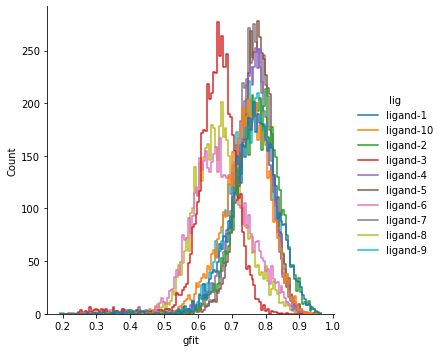

In [9]:
sns.displot(df, x="gfit", hue="lig", element="step", fill=False)

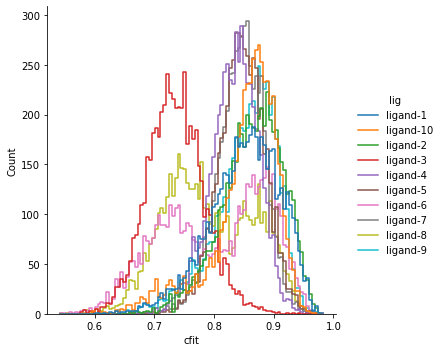

In [10]:
sns.displot(df, x="cfit", hue="lig", element="step", fill=False)

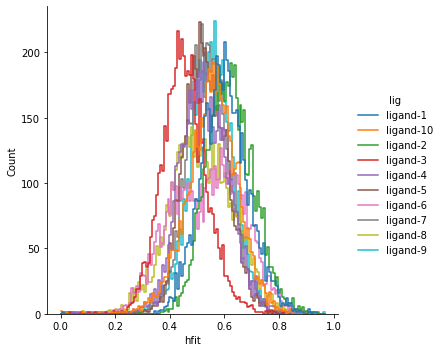

In [11]:
sns.displot(df, x="hfit", hue="lig", element="step", fill=False)

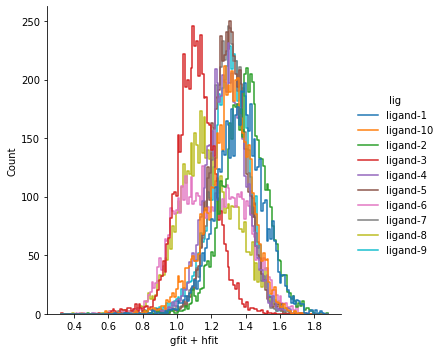

In [12]:
sns.displot(df, x="gfit + hfit", hue="lig", element="step", fill=False)

In [13]:
def getbest(df, lig, criteria="cfit", k=10):
    return df.query("lig == @lig").sort_values(criteria, ascending=False).head(k)


def showbest(df, lig, criteria="cfit", k=10):
    best = getbest(df, lig, criteria, k)

    for idx, row in best.iterrows():
        p = show(row.fragmol, row.mol)
        print(row[criteria])
        display(p)

In [14]:
showbest(df, "ligand-9", "gfit + hfit", k=3)

1.838862559241706


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

1.731958762886598


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

1.712121212121212


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol